# 선형회귀분석과 로지스틱 회귀분석

예측 모형에서 가장 널리 알려진 회귀분석을 이용하여 머신러닝 알고리즘에서 사용되는 용어의 개념을 이해합니다. 회귀분석에 대한 이해를 전제로 머신러닝에서 사용되는 개념을 이해하는 것이 강의의 주된 목표입니다.

<img src='./images/regression_midmap.png' width="800">

## 선형회귀


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 포인트 정의. y=2x-1
x = np.array([-2, -1, 0, 1, 2])
y = 2 * x - 1

# 오차 추가
np.random.seed(317)
error = np.random.normal(0, 0.5, size=y.shape)
y = y + error

data = pd.DataFrame({'x': x, 'y': y})
data

,x,y
0,-2,-4.457830
1,-1,-3.468733
2,0,-0.959249
3,1,1.246108
4,2,3.297301


,x,y
0,-2,-4.457830
1,-1,-3.468733
2,0,-0.959249
3,1,1.246108
4,2,3.297301


선형 회귀모형 $ y = ax + b $ 을 가정

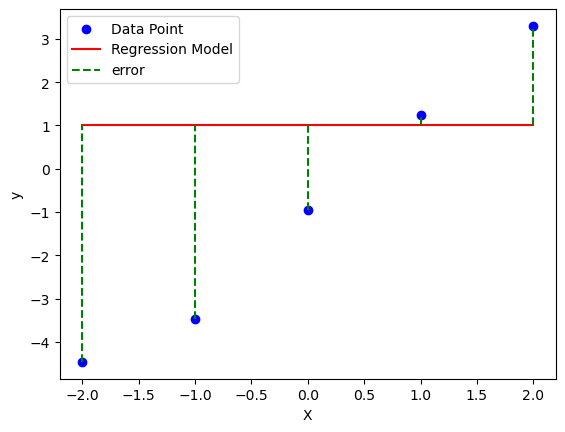

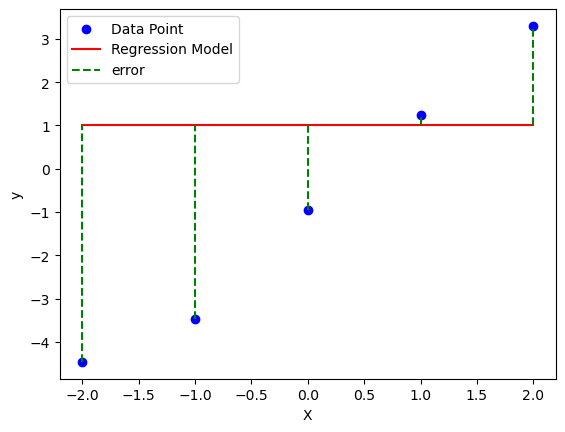

In [3]:
# 임의 모형 적용. a=0, b = 1 이라면?
pred = 2 * x - 1
pred = 0 * x + 1
error = y - pred

# 산점도 그리기
plt.scatter(x, y, color='blue', label='Data Point')
plt.plot(x, pred, color='red', label='Regression Model')

# 오차
for i in range(len(x)):
    if i==0:
        plt.vlines(x[i], min(y[i], pred[i]), max(y[i], pred[i]), linestyle='--', color='green', label='error')
    else:
        plt.vlines(x[i], min(y[i], pred[i]), max(y[i], pred[i]), linestyle='--', color='green')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

a, b 임의의 후보값에 대한 mse 산출

In [4]:
candidate = [(0,1), (1,-1), (2,1), (2,-1)]
for a, b in candidate:
    pred = a * x + b
    error = y - pred
    mse = (error ** 2).mean().round(3)
    print(f'a={a}, b={b} 일 때, mse={mse}')

a=0, b=1 일 때, mse=11.787
a=1, b=-1 일 때, mse=2.223
a=2, b=1 일 때, mse=3.607
a=2, b=-1 일 때, mse=0.133
a=0, b=1 일 때, mse=11.787
a=1, b=-1 일 때, mse=2.223
a=2, b=1 일 때, mse=3.607
a=2, b=-1 일 때, mse=0.133


## OLSE 정리

Ordinary Least Squares Estimators

**파라미터** : 머신러닝에서 알고리즘이 학습을 통하여 찾아내고자 하는 변수

$ y = ax + b $

In [5]:
from sklearn.linear_model import LinearRegression

a = 2.023, b = -0.868, mse = 0.115
a = 2.023, b = -0.868, mse = 0.115


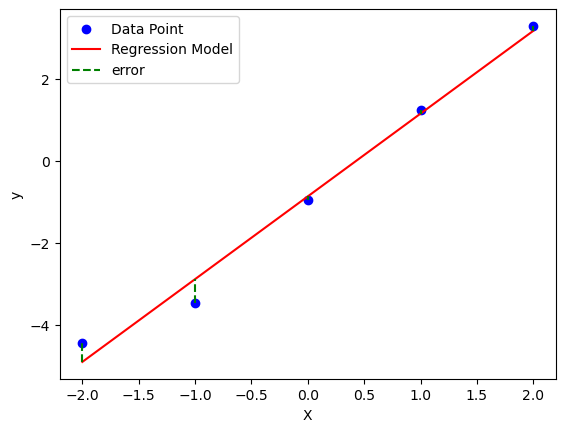

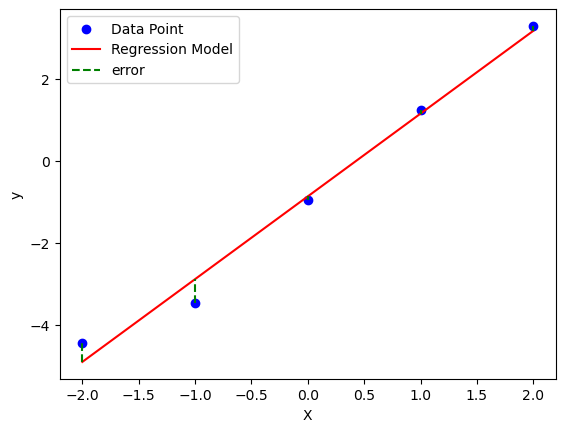

In [6]:
# 선형 회귀 모델 정의
model = LinearRegression()

# 모델 훈련
X = x.reshape(-1,1)
model.fit(X, y)

# 예측치 및 오차 산출
pred = model.predict(X)
error = y - pred

print('a = {0}, b = {1}, mse = {2}'.format(round(model.coef_[0], 3), round(model.intercept_, 3), (error ** 2).mean().round(3)))

# 산점도 그리기
plt.scatter(x, y, color='blue', label='Data Point')
plt.plot(x, pred, color='red', label='Regression Model')

# 오차
for i in range(len(x)):
    if i==0:
        plt.vlines(x[i], min(y[i], pred[i]), max(y[i], pred[i]), linestyle='--', color='green', label='error')
    else:
        plt.vlines(x[i], min(y[i], pred[i]), max(y[i], pred[i]), linestyle='--', color='green')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
Sxx = ((x - x.mean()) ** 2).sum()
Sxy = ((x - x.mean()) * (y - y.mean())).sum()

a = Sxy / Sxx
b = y.mean() - a * x.mean()

round(a,3), round(b, 3)

(2.023, -0.868)

(2.023, -0.868)

## Gradient Descent


OLSE 의 경우에는 닫힌해(Closed Solution)로 구할수 있지만 최솟값을 구하는 많은 문제는 열린해로 파라메터 값을 산출하기 위한 명확한 수식이 없습니다. 열린해를 구하기 위한 대표적인 방법이 Gradient Descent방법이며, 익히 알고 있는 OLSE에 적용함으로써 Gradient Descent를 이해합니다.

아래 예시는 $ y=1 $ 에 해당하는 원함수를 추정하는 예시입니다. 

In [8]:
# 데이터 포인트 정의. y=1
x = np.array([-2, -1, 0, 1, 2])
np.random.seed(317)
y = 1 + np.random.normal(0, 0.5, size=x.shape)

data = pd.DataFrame({'x': x, 'y': y})
display(data)

print('OLSE of b:', y.mean())

,x,y
0,-2,1.542170
1,-1,0.531267
2,0,1.040751
3,1,1.246108
4,2,1.297301


OLSE of b: 1.1315194837540188


,x,y
0,-2,1.542170
1,-1,0.531267
2,0,1.040751
3,1,1.246108
4,2,1.297301


OLSE of b: 1.1315194837540188


산출된 파라메터 $b$ 에 따른 SSE 손실함수를 적용합니다. 손실함수를 최소로하는 $b$를 구하는 것이 목표입니다.

기울기가 0 이되는 지점을 찾는 것이 목표이며, 기울기의 크기만큼 갑을 업데이트 합니다.

$ L(b) = \sum_{i=1}^{5} (y_i - b) ^2  $

$ argmin_{b} L(b) $

$ L'(b) = -2 \times \sum_{i=1}^{5} (y_i - b) $


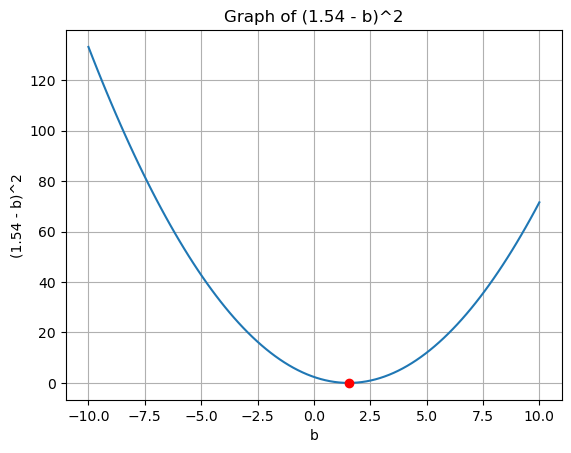

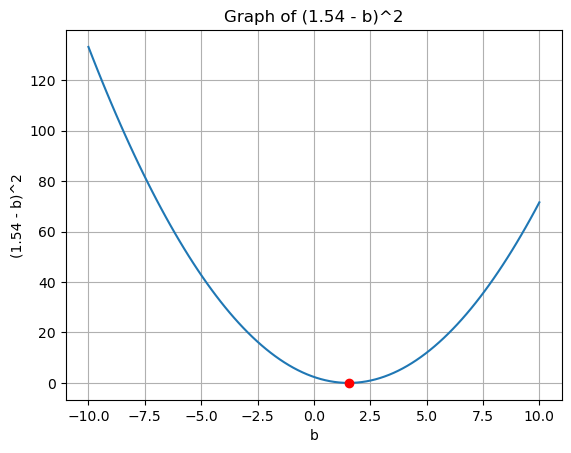

In [9]:
# 데이터포인트 1개를 가정, y = 1.54 인 경우

# b 값 범위 정의
b_values = np.linspace(-10, 10, 100)

# 수식 계산
y_values = (1.54 - b_values) ** 2

# 그래프 그리기
plt.plot(b_values, y_values)
plt.xlabel('b')
plt.ylabel('(1.54 - b)^2')
plt.title('Graph of (1.54 - b)^2')
plt.scatter([1.54], [0], color='red', zorder=5)
plt.grid(True)
plt.show()

원래의 값에서 기울기만큼을 차감하여 다음 값으로 정의합니다.

In [10]:
# b = -7.5 에서 시작
b = -7.5
gradient = -2 * (1.54 - b)

b = b - gradient
gradient, b

(-18.08, 10.579999999999998)

(-18.08, 10.579999999999998)

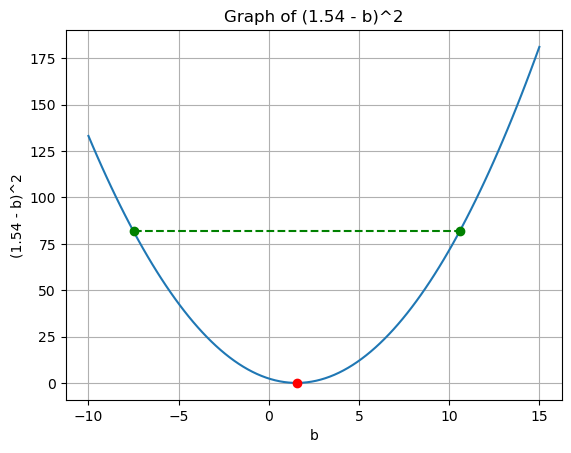

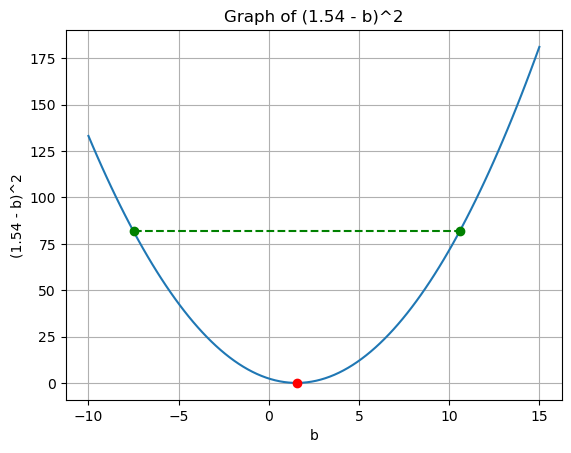

In [11]:
# y = 1.54 인 경우

# b 값 범위 정의
b_values = np.linspace(-10, 15, 100)

# 수식 계산
y_values = (1.54 - b_values) ** 2

# 그래프 그리기
plt.plot(b_values, y_values)
plt.xlabel('b')
plt.ylabel('(1.54 - b)^2')
plt.title('Graph of (1.54 - b)^2')
plt.scatter([1.54], [0], color='red', zorder=5)
plt.grid(True)


b = -7.5
L = (1.54 - b) ** 2
plt.scatter([b], [L], color='green', zorder=5)

gradient = -2 * (1.54 - b)
next_b = b - gradient
next_L = (1.54 - next_b) ** 2

plt.scatter([next_b], [next_L], color='green', zorder=5)

plt.plot([b, next_b], [L, next_L], '--', color='green')


plt.show()

-7.5 -> 10.58 -> -7.5 -> 10.58 -> -7.5 -> 10.58 -> -7.5 -> 10.58 -> -7.5 -> 10.58-7.5 -> 10.58 -> -7.5 -> 10.58 -> -7.5 -> 10.58 -> -7.5 -> 10.58 -> -7.5 -> 10.58

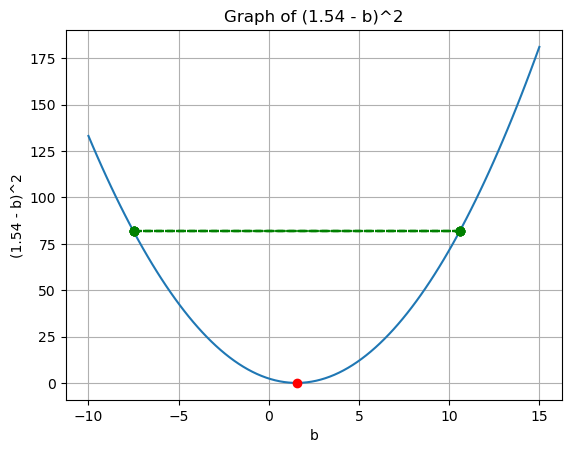

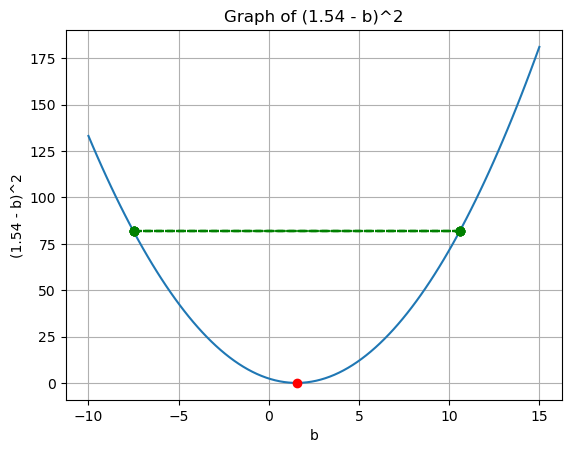

In [12]:
import numpy as np

# b 값 범위 정의
b_values = np.linspace(-10, 15, 100)

# 수식 계산
y_values = (1.54 - b_values) ** 2

# 그래프 그리기
plt.plot(b_values, y_values)
plt.xlabel('b')
plt.ylabel('(1.54 - b)^2')
plt.title('Graph of (1.54 - b)^2')
plt.scatter([1.54], [0], color='red', zorder=5)
plt.grid(True)

b = -7.5
L = (1.54 - b) ** 2
plt.scatter([b], [L], color='green', zorder=5)

n_iter = 10

for i in range(n_iter):
    if i == 0:
        print(round(b, 2), end='')
    else:
        print(' ->', round(b,2), end='')
    
    gradient = -2 * (1.54 - b)
    next_b = b - gradient
    next_L = (1.54 - next_b) ** 2

    plt.scatter([next_b], [next_L], color='green', zorder=5)

    plt.plot([b, next_b], [L, next_L], '--', color='green')
    
    b, L = next_b, next_L

plt.show()

#### Learning Rate

- 학습률. 경사하강법에 따라 파라미터를 업데이트할 때, 한번에 업데이트하는 수준을 정의

-7.5 -> 6.96 -> -1.71 -> 3.49 -> 0.37 -> 2.24 -> 1.12 -> 1.79 -> 1.39 -> 1.63-7.5 -> 6.96 -> -1.71 -> 3.49 -> 0.37 -> 2.24 -> 1.12 -> 1.79 -> 1.39 -> 1.63

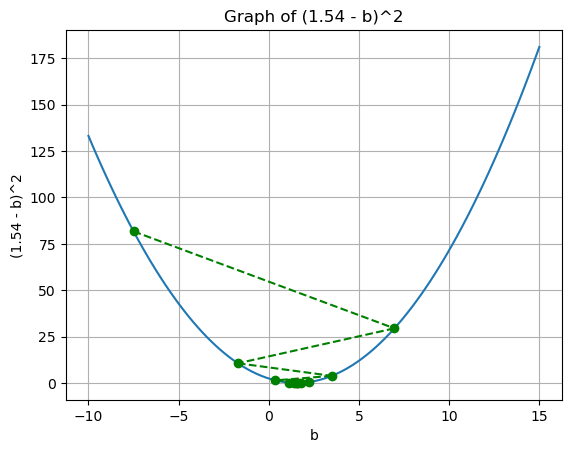

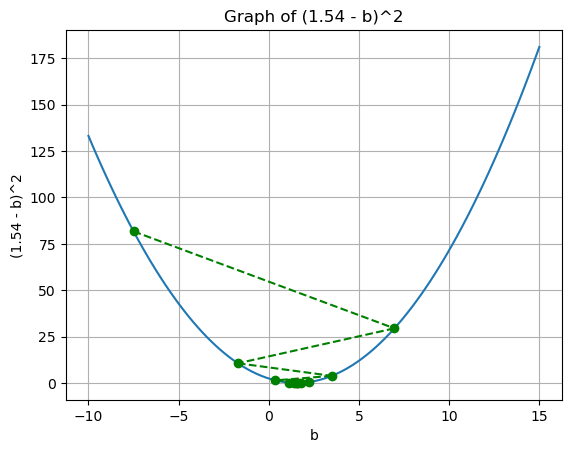

In [13]:
# y = 1.54 인 경우

# b 값 범위 정의
b_values = np.linspace(-10, 15, 100)

# 수식 계산
y_values = (1.54 - b_values) ** 2

# 그래프 그리기
plt.plot(b_values, y_values)
plt.xlabel('b')
plt.ylabel('(1.54 - b)^2')
plt.title('Graph of (1.54 - b)^2')
plt.scatter([1.54], [0], color='red', zorder=5)
plt.grid(True)

b = -7.5
L = (1.54 - b) ** 2
plt.scatter([b], [L], color='green', zorder=5)

n_iter = 10
learning_rate = 0.8

for i in range(n_iter):
    if i == 0:
        print(round(b, 2), end='')
    else:
        print(' ->', round(b,2), end='')
    gradient = -2 * (1.54 - b)
    
    # ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
    next_b = b - gradient * learning_rate
    # ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

    next_L = (1.54 - next_b) ** 2

    plt.scatter([next_b], [next_L], color='green', zorder=5)

    plt.plot([b, next_b], [L, next_L], '--', color='green')
    
    if abs(next_L - L) < 1e-5:
        break
    
    b, L = next_b, next_L

plt.show()

## SGD

- Stochastic Gradient Descent
- 매 포인트를 Random하게(Stochastic) 선택하고, 파라미터를 계속해서 업데이트
- *아래 예시는 모든 데이터 포인트를 순차로 수행*
- 데이터 포인트를 1개가 아니라 여러개를 Random하게 선택하는 방법을 **미니배치** 라고 부르며, 한번에 처리하는 데이터의 크기를 **batch size** 라고 부름

In [14]:

b = -7.5
learning_rate = 0.1

for yi in y:
        
    L = (yi - b) ** 2
    
    gradient = -2 * (yi - b)
    next_b = b - gradient * learning_rate
    next_L = (yi - next_b) ** 2
    
    print("y={0}, b={1} -> {2}".format(round(yi, 4), round(b, 2), round(next_b, 2)))

    b, L = next_b, next_L   



y=1.5422, b=-7.5 -> -5.69
y=0.5313, b=-5.69 -> -4.45
y=1.0408, b=-4.45 -> -3.35
y=1.2461, b=-3.35 -> -2.43
y=1.2973, b=-2.43 -> -1.68
y=1.5422, b=-7.5 -> -5.69
y=0.5313, b=-5.69 -> -4.45
y=1.0408, b=-4.45 -> -3.35
y=1.2461, b=-3.35 -> -2.43
y=1.2973, b=-2.43 -> -1.68


In [15]:
b = -7.5
learning_rate = 0.1

max_iter = 10

for i in range(max_iter):
    print(f'{i+1}-th iteration.')
    for yi in y:
        L = (yi - b) ** 2
        
        gradient = -2 * (yi - b)
        next_b = b - gradient * learning_rate
        next_L = (yi - next_b) ** 2

        print("  y={0}, b={1} -> {2}".format(round(yi, 4), round(b, 2), round(next_b, 2)))

        b, L = next_b, next_L

1-th iteration.
  y=1.5422, b=-7.5 -> -5.69
  y=0.5313, b=-5.69 -> -4.45
  y=1.0408, b=-4.45 -> -3.35
  y=1.2461, b=-3.35 -> -2.43
  y=1.2973, b=-2.43 -> -1.68
2-th iteration.
  y=1.5422, b=-1.68 -> -1.04
  y=0.5313, b=-1.04 -> -0.73
  y=1.0408, b=-0.73 -> -0.37
  y=1.2461, b=-0.37 -> -0.05
  y=1.2973, b=-0.05 -> 0.22
3-th iteration.
  y=1.5422, b=0.22 -> 0.49
  y=0.5313, b=0.49 -> 0.49
  y=1.0408, b=0.49 -> 0.6
  y=1.2461, b=0.6 -> 0.73
  y=1.2973, b=0.73 -> 0.85
4-th iteration.
  y=1.5422, b=0.85 -> 0.98
  y=0.5313, b=0.98 -> 0.89
  y=1.0408, b=0.89 -> 0.92
  y=1.2461, b=0.92 -> 0.99
  y=1.2973, b=0.99 -> 1.05
5-th iteration.
  y=1.5422, b=1.05 -> 1.15
  y=0.5313, b=1.15 -> 1.02
  y=1.0408, b=1.02 -> 1.03
  y=1.2461, b=1.03 -> 1.07
  y=1.2973, b=1.07 -> 1.12
6-th iteration.
  y=1.5422, b=1.12 -> 1.2
  y=0.5313, b=1.2 -> 1.07
  y=1.0408, b=1.07 -> 1.06
  y=1.2461, b=1.06 -> 1.1
  y=1.2973, b=1.1 -> 1.14
7-th iteration.
  y=1.5422, b=1.14 -> 1.22
  y=0.5313, b=1.22 -> 1.08
  y=1.0408, 

In [16]:
b = -7.5
L = ((y - b) ** 2).sum()

learning_rate = 0.01
max_iter = 10000

for i in range(max_iter):
    for yi in y:
        L = (yi - b) ** 2
        
        gradient = -2 * (yi - b)
        next_b = b - gradient * learning_rate
        next_L = (yi - next_b) ** 2

        b, L = next_b, next_L
        
print(b)

1.1325025829441369
1.1325025829441369


## Losistic Regression


$ P(Y=1 | X) = \frac{1}{1 + exp(\beta _0 + \beta_1 x_1 +  \beta_2 x_2 + \dots + \beta_p x_p)}$



### 목적함수

통계학에서는 우도함수(Likelihood Function)를 최대로하는 파라미터를 찾아갑니다. 머신러닝에서는 Cross-Entropy-Error를 최소화하도록 학습합니다. 2가지의 개념은 다르지만 실제 최적화 문제를 푸는 방식은 동일합니다.

#### Maximum Likelyhood Estimator

- 우도함수를 최대화시키는 추정값을 MLE 라고함
- 로지스틱 회귀분석의 우도함수는 이항분포를 기준으로 정의하며, log 함수의 선형성을 활용하여 우도함수를 최대화시키는 문제는 log L을 최대화시키는 문제로 처리할수 있습니다. 최종적으로는 -log L 을 최소화시키는 최적화 문제를 통하여 MLE를 도출합니다.

    $ L = \prod P(y_i | \hat y_i ) $
    
    $ log L = \sum (y_i log(y_i) + (1-y_i )  log(1-y_i)) $
    
    $ argmin_{\beta_0, \beta_1,\dots} -log L $
    
#### Cross-Entropy-Loss

- 크로스 엔트로피 손실(Cross Entropy Loss)은 머신러닝 및 딥러닝에서 사용되는 손실 함수 중 하나로, 주로 분류 문제에서 모델의 예측과 실제 레이블 간의 차이를 측정하는 데 사용됩니다. 특히 이진 분류(Binary Classification)에서 널리 사용됩니다.

- 크로스 엔트로피 손실은 두 확률 분포 사이의 유사성을 측정하는 데 사용됩니다. 이진 분류에서는 모델이 예측한 확률 분포와 실제 레이블에 해당하는 확률 분포 사이의 크로스 엔트로피를 계산합니다. 
- 이진분류 문젯에서의 Cross Entropy Loss 는 아래와 같습니다. -log L 과 동일하기 때문에 통계적 관점과 머신러닝 관점 모두 동일한 목적으로 로지스틱 회귀분석을 학습합니다.

    $ Cross Entropy Loss = -(y log(\hat y)+ (1-y) log(1-\hat y)) $
    
    $ \hat y $ : y=1에 대한 예측 확률
    
    y=1 일때 Loss = $ -log( \hat y) $, y=0 일때 Loss = $ -log(1- \hat y) $
    
    |예측값|y=0|y=1|
    |---|---|---|
    |0.1|-(1-0)*log(1-0.1)=0.1|-log(0.1)=2.3|
    |0.4|-(1-0)*log(1-0.4)=0.5|-log(0.4)=0.9|
    |0.6|-(1-0)*log(1-0.6)=0.9|-log(0.4)=0.5|
    |0.9|-(1-0)*log(1-0.9)=2.3|-log(0.9)=0.1|
    

    
    

### 최적화 방법(모수 추정 방법)

- 로지스틱 회귀분석은 선형회귀분석과 같은 명시적인 식으로 MLE를 도출할 수 없습니다.
- 경사하강법과 같은 최적화 기법을 이용해서 손실함수를 최소화하는 ESTIMATOR를 도출합니다.
- 로지스틱 회귀분석에서는 IRLSM과 BFGS 방법을 이용하여 파라미터를 추정합니다.

#### IRLSM
IRLSM은 선형 모델에서 가중 최소 제곱법을 사용하는 반복적 최적화 알고리즘입니다.
주로 로버스트 선형 회귀 (Robust Linear Regression)와 같은 문제에서 사용됩니다. 로버스트 선형 회귀는 이상치에 민감하지 않도록 설계된 선형 회귀 모델입니다.
IRLSM은 각 반복에서 가중치를 업데이트하고, 업데이트된 가중치로 최소 제곱 회귀를 다시 푸는 과정을 반복하여 모델 파라미터를 추정합니다.
이 알고리즘은 각 반복에서 수렴하기까지 반복적으로 가중치를 업데이트하므로 일반적으로 수렴 속도가 느립니다.

#### BFGS

BFGS 방법은 Quasi-Newton 방법 중 하나로, 함수의 Hessian 행렬의 근사값을 업데이트하여 최적화를 수행합니다.
BFGS는 고차원 문제에서 효율적으로 작동하며, 제한된 메모리 사용으로 메모리 효율적입니다.
이 알고리즘은 경사 하강법보다 빠르게 수렴하고, 일반적으로 수렴이 보장됩니다. 그러나 목적 함수가 비싸거나 희소한 경우 메모리 사용량이 증가하여 성능이 감소할 수 있습니다.


### 변수의 선택

- 로지스틱 회귀분석은 변수와 모수가 1:1로 대응하며, 추정된 모수의 값에 따라 모형의 성능이 결정됩니다.
- 통계적 관점의 로지스틱 회귀분석은 변수의 추가 여부에 대하여 유의확률을 계산하고 이를 이용하여 변수를 선택합니다. forward selection, backward selection, stepwise selection 방법이 있습니다.
- 머신러닝 관점에서의 로지스틱 회귀분석은 변수의 모수 크기를 이용하여 변수의 영향도를 제어합니다. 불필요한 변수의 모수는 추정값을 0에 가깝게 부여하여 변수를 제거한것과 같은 효과를 부여합니다.
- 통계적 관점에서의 로지스틱 회귀분석에서는 AIC, BIC 와 같은 지표를 이용하여 모델의 복잡도(파라미터의 개수)에 penalty를 부과함으로써 지나치게 많은 변수가 모형에 반영되는 것을 제어합니다.
- 머신러닝 관점에서는 정규화(regularization)을 이용하여 변수의 영향도를 조절합니다.


### 시그모이드 함수

시그모이드 함수(또는 로지스틱 함수)는 S자 형태의 비선형 함수로, 입력 값을 0과 1 사이의 확률 값으로 변환하는 데 사용됩니다. 주로 이진 분류 문제에서 확률 값을 예측하는 데에 쓰입니다. 시그모이드 함수는 다음과 같이 정의됩니다:

$ sigmode function = \sigma(z) = \frac{1}{e ^{-z}}$



시그모이드 함수는 다음과 같은 특징을 가지고 있습니다:

- 범위: 시그모이드 함수의 출력은 항상 0과 1 사이입니다. 이는 확률로 해석될 수 있습니다.

- 모양: z=0에서 최대값 0.5를 가지며, z가 증가함에 따라 1에 수렴하고, z가 감소함에 따라 0에 수렴합니다. 따라서 시그모이드 함수는 S자 형태를 가지게 됩니다.

- 미분 가능성: 시그모이드 함수는 연속적이며 미분 가능합니다. 이는 주로 최적화 알고리즘(예: 경사 하강법)에서 사용됩니다.

- 비선형성: 시그모이드 함수는 비선형 함수입니다. 이는 로지스틱 회귀와 같은 모델이 선형 함수를 사용하는 경우에도 모델 전체가 비선형이 되도록 합니다.

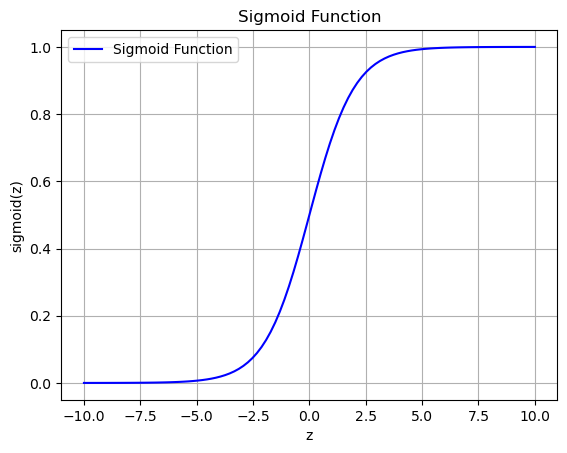

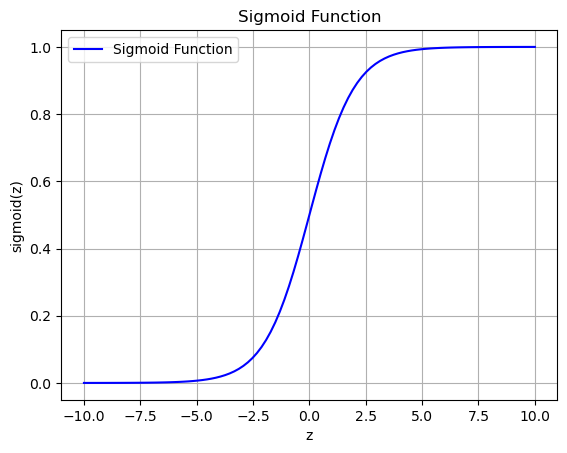

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 입력 범위 정의
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# 그래프 그리기
plt.plot(z_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()


### 정규화(Regularization)


Regularization(정규화)는 머신러닝 및 통계학에서 모델의 복잡도를 조절하여 과적합(Overfitting)을 방지하고 일반화 성능을 향상시키는 기술입니다. Regularization은 모델의 가중치(weights)나 계수(coefficients)에 대한 추가적인 제약 조건을 부여하여 모델의 일반화 성능을 개선합니다.

일반적으로 Regularization은 손실 함수(Loss Function)에 패널티 항을 추가하여 구현됩니다. 이 패널티 항은 모델의 가중치나 계수가 커지는 것을 제한하고, 모델이 단순해지도록 유도합니다. Regularization의 기본 아이디어는 모델이 훈련 데이터뿐만 아니라 새로운 데이터에도 잘 일반화되도록 하는 것입니다.

주로 사용되는 Regularization 기법으로는 다음과 같은 것들이 있습니다:

**1. L1 Regularization (Lasso Regression)**

L1 Regularization은 가중치의 절대값에 대한 패널티를 추가합니다. 이는 일부 가중치를 0으로 만들어 특성 선택(feature selection)을 수행
하고 모델을 더 간단하게 만듭니다


**2. L2 Regularization (Ridge Regression)**

L2 Regularization은 가중치의 제곱에 대한 패널티를 추가합니다. 이는 모든 가중치가 작아지도록 유도하여 특정 변수에 의존하는 경향을 막고 보다 더 일반화 된 모델을 생성할 수 있습니다.


**3. Elastic Net Regularization**

Elastic Net은 L1 Regularization과 L2 Regularization을 결합한 형태로, 두 가지 패널티를 동시에 적용합니다. 이는 L1 Regularization의 특성 선택 기능과 L2 Regularization의 모든 특성을 고려하는 기능을 모두 제공합니다.
Regularization을 통해 모델의 일반화 성능을 향상시키고, 과적합을 방지할 수 있습니다. 이는 모델이 새로운 데이터에 대해 더 잘 예측할 수 있도록 도와줍니다.

---

로지스틱 회귀분석에서는 $\lambda$ 를 이용하여 Regularization 강도를 조정합니다. 또한, $\alpha$ 를 이용하여 Elastic Net Regularization 을 구현합니다.


loss-function = $ \sum (y_i log(y_i) + (1-y_i ) log(1-y_i)) $

loss-function with l1-penalty = $  \sum (y_i log(y_i) + (1-y_i ) log(1-y_i)) + \lambda * |\beta| $

loss-function with l2-penalty = $ \sum (y_i log(y_i) + (1-y_i ) log(1-y_i)) + \lambda * ||\beta|| $

loss-function with elastic net = $ \sum (y_i log(y_i) + (1-y_i ) log(1-y_i))  +  \lambda * ((\alpha * |\beta|) + (1-\alpha) * ||\beta||)) $


#### L1-penalty

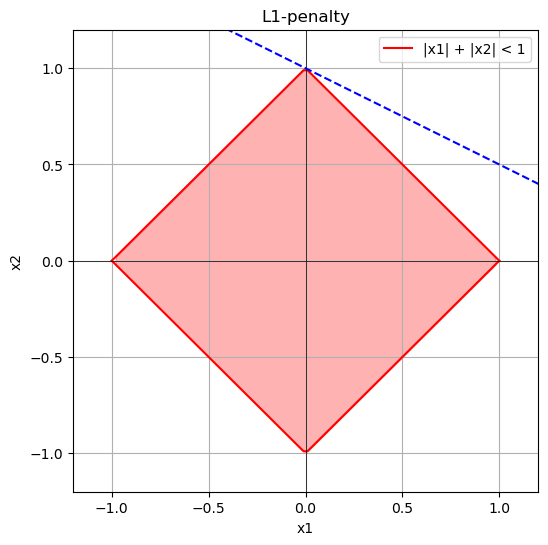

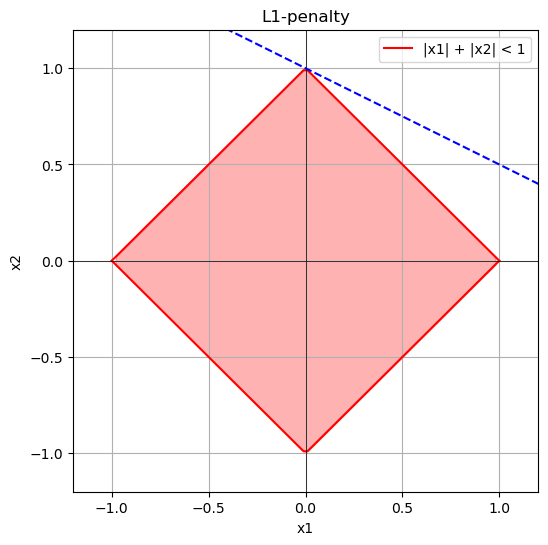

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2 값 범위 정의
x1 = np.linspace(-1.0, 1.0, 100)
x2_pos = 1 - np.abs(x1)
x2_neg = -1 + np.abs(x1)

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.plot(x1, x2_pos, 'r', label='|x1| + |x2| < 1')
plt.plot(x1, x2_neg, 'r')
plt.fill_between(x1, x2_pos, x2_neg, where=(x2_neg < x2_pos), color='red', alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# 파란색 실선 그리기
x1 = np.linspace(-1.5, 1.5, 100)
plt.plot(x1, -0.5 * x1 + 1, 'b--')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('L1-penalty')
plt.grid(True)
plt.legend()
plt.show()


#### L2-penalty

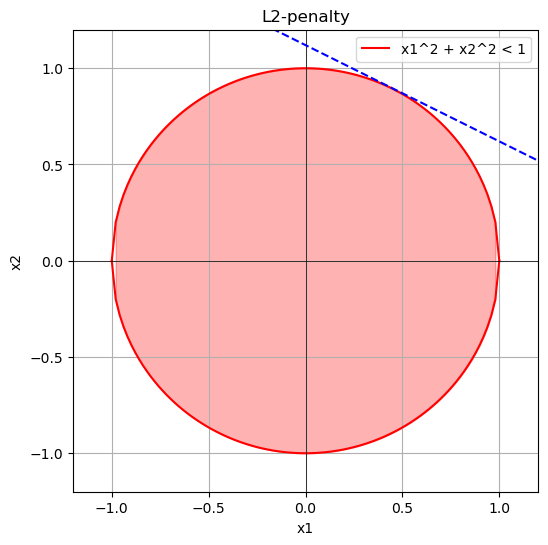

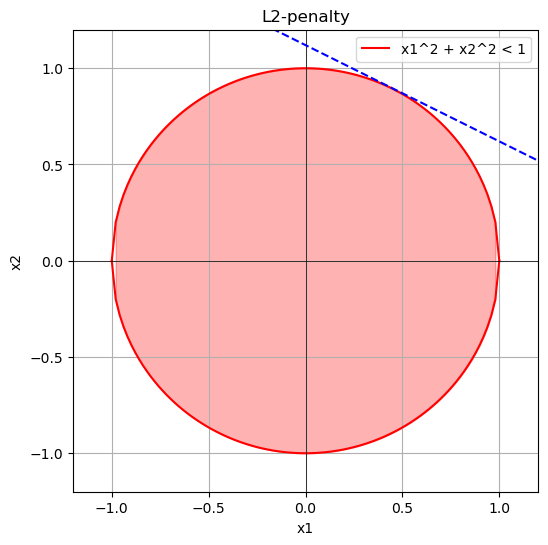

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2 값 범위 정의
x1 = np.linspace(-1.0, 1.0, 100)
x2_pos = np.sqrt(1 - x1**2)
x2_neg = -np.sqrt(1 - x1**2)

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.plot(x1, x2_pos, 'r', label='x1^2 + x2^2 < 1')
plt.plot(x1, x2_neg, 'r')
plt.fill_between(x1, x2_pos, x2_neg, where=(x2_neg < x2_pos), color='red', alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# 파란색 실선 그리기
x1 = np.linspace(-1.5, 1.5, 100)
plt.plot(x1, -0.5 * x1 + 1.12, 'b--')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('L2-penalty')
plt.grid(True)
plt.legend()
plt.show()


#### 정규화에 대한 결과 비교

In [20]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 생성
X_train, y_train = make_classification(n_samples=10000, n_features=10, n_classes=2, n_clusters_per_class=1, class_sep=0.3, random_state=317)
X_test, y_test = make_classification(n_samples=10000, n_features=10, n_classes=2, n_clusters_per_class=1, class_sep=0.8, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# 로지스틱 회귀 모델 적합 
logreg = LogisticRegression(solver='liblinear')  
logreg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)
print("Training Set 정확도: {:.3f}".format(train_accuracy))
print("Test Set 정확도: {:.3f}".format(test_accuracy))

print(logreg.coef_)

Training Set 정확도: 0.713
Test Set 정확도: 0.415
[[-0.00439951 -0.02862164 -0.0011914   0.0228846  -0.11205586 -0.14101372
  -0.36602155 -0.0175643  -0.66328312 -0.01868919]]
Training Set 정확도: 0.713
Test Set 정확도: 0.415
[[-0.00439951 -0.02862164 -0.0011914   0.0228846  -0.11205586 -0.14101372
  -0.36602155 -0.0175643  -0.66328312 -0.01868919]]


In [22]:
# 로지스틱 회귀 모델 적합 (L1 regularization 적용)
logreg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear') 
logreg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)
print("Training Set 정확도: {:.3f}".format(train_accuracy))
print("Test Set 정확도: {:.3f}".format(test_accuracy))

logreg.coef_

Training Set 정확도: 0.713
Test Set 정확도: 0.484
Training Set 정확도: 0.713
Test Set 정확도: 0.484


array([[-3.93400309e-03, -2.81773645e-02, -7.35526547e-04,
         2.24216283e-02,  0.00000000e+00,  0.00000000e+00,
        -6.03897317e-02, -1.71161922e-02, -8.80544789e-01,
        -1.82401510e-02]])

array([[-3.93400309e-03, -2.81773645e-02, -7.35526547e-04,
         2.24216283e-02,  0.00000000e+00,  0.00000000e+00,
        -6.03897317e-02, -1.71161922e-02, -8.80544789e-01,
        -1.82401510e-02]])

In [23]:
# 로지스틱 회귀 모델 적합 (L2 regularization 적용)
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # 'solver' 매개변수는 'liblinear'를 사용하여야 합니다.
logreg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)
print("Training Set 정확도: {:.3f}".format(train_accuracy))
print("Test Set 정확도: {:.3f}".format(test_accuracy))

logreg.coef_

Training Set 정확도: 0.713
Test Set 정확도: 0.415


array([[-0.00439951, -0.02862164, -0.0011914 ,  0.0228846 , -0.11205586,
        -0.14101372, -0.36602155, -0.0175643 , -0.66328312, -0.01868919]])

Training Set 정확도: 0.713
Test Set 정확도: 0.415


array([[-0.00439951, -0.02862164, -0.0011914 ,  0.0228846 , -0.11205586,
        -0.14101372, -0.36602155, -0.0175643 , -0.66328312, -0.01868919]])

In [24]:
# 로지스틱 회귀 모델 적합 (L1, L2 regularization 적용)
logreg = LogisticRegression(penalty='elasticnet', l1_ratio=0.2, solver='saga') 
logreg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)
print("Training Set 정확도: {:.3f}".format(train_accuracy))
print("Test Set 정확도: {:.3f}".format(test_accuracy))

logreg.coef_

Training Set 정확도: 0.713
Test Set 정확도: 0.397


C:\Users\sjhbb\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Set 정확도: 0.713
Test Set 정확도: 0.397


array([[-0.00430826, -0.02853329, -0.00110055,  0.02279521, -0.0506441 ,
        -0.09246342, -0.23326281, -0.01747431, -0.75713859, -0.01860076]])

C:\Users\sjhbb\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[-0.00430826, -0.02853329, -0.00110055,  0.02279521, -0.0506441 ,
        -0.09246342, -0.23326281, -0.01747431, -0.75713859, -0.01860076]])